In [1]:
# Import required packages
# Refer to directions in Canvas on how to install packages if you get an import error
import pandas as pd
import random
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [2]:
# Load all our training data and list the training features
all_data = pd.read_csv("prep_files/data/pet_test.csv")
all_features = ['height', 'weight', 'has_fur', 'likes_belly_rubs', 'likes_balls']

In [3]:
# Feature Bagging: Randomly select 2 features
sampled_features = random.sample(all_features, k=2)

print("Features used:")
print(sampled_features)

# Bootstrapping: Randomly sample 100 rows of data
sampled_data = resample(all_data, replace=True, n_samples=100)[sampled_features + ['is_dog']]

sampled_data.head()

Features used:
['height', 'has_fur']


,height,has_fur,is_dog
2,9.214591,1.0,False
0,16.208130,1.0,True
1,8.792611,1.0,True
1,8.792611,1.0,True
1,8.792611,1.0,True


In [4]:
# Train a decision tree on the sampled data
X = sampled_data[sampled_features]
y = sampled_data['is_dog']

pet_tree = DecisionTreeClassifier(max_depth=2, random_state=1)
pet_tree.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=1)

Tree saved as tree.png


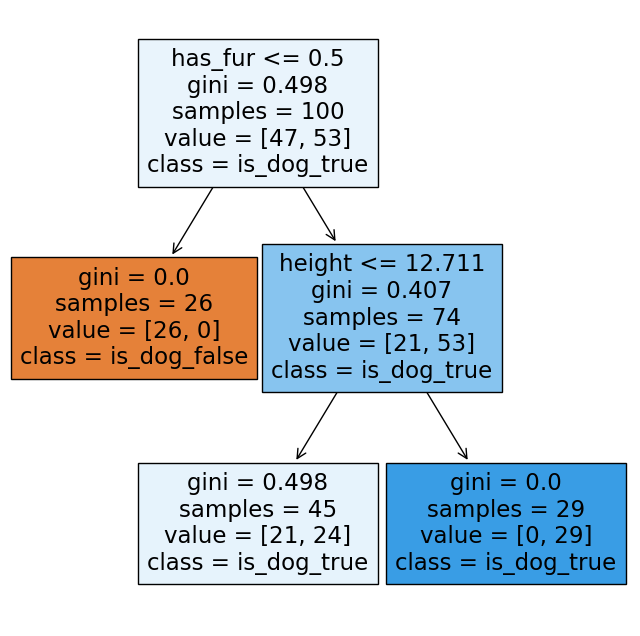

In [5]:
# Visualize tree created
plt.figure(figsize=(8,8))  # set plot size (denoted in inches)
plot_tree(pet_tree, feature_names=sampled_features, class_names=["is_dog_false", "is_dog_true"], filled=True)
plt.savefig('pet_tree.png')

print("Tree saved as tree.png")

In [6]:
# Import test data and create predictions for data
test_data = pd.read_csv("prep_files/data/pet_test.csv")

test_data['predictions'] = pet_tree.predict(test_data[sampled_features])

for index, row in enumerate(test_data.to_dict('records')):
  print(f"\n Row number {index}")
  for feature in row:
    if feature not in ['pet_type', 'is_dog']:
      print(f"{feature}: {row[feature]}")


 Row number 0
height: 16.208129807791916
weight: 56.92075329515124
has_fur: 1.0
likes_belly_rubs: 1.0
likes_balls: 1.0
predictions: True

 Row number 1
height: 8.79261129277242
weight: 24.015846679771748
has_fur: 1.0
likes_belly_rubs: 1.0
likes_balls: 0.0
predictions: True

 Row number 2
height: 9.214590770329645
weight: 20.911406464454274
has_fur: 1.0
likes_belly_rubs: 0.0
likes_balls: 1.0
predictions: True

 Row number 3
height: 11.492447
weight: 0.479632
has_fur: 0.0
likes_belly_rubs: 0.0
likes_balls: 0.0
predictions: False
